In [1]:
%cd ~/NetBeansProjects/ExpLosion/
%load_ext autoreload
from notebooks.common_imports import *
from gui.output_utils import *

sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


In [2]:
s = {'document_features_ev': 'AN+NN',
     'document_features_tr': 'J+N+AN+NN',
     'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
     'expansions__entries_of_id': None,
     'expansions__k': 3,
     'expansions__neighbour_strategy': 'linear',
     'expansions__noise': 0.0,
     'expansions__use_random_neighbours': 0,
     'expansions__use_similarity': 0,
     'expansions__vectors__algorithm': 'word2vec',
#      'expansions__vectors__composer': 'Add',
     'expansions__vectors__dimensionality': 100,
     'expansions__vectors__rep': 0,
     'expansions__vectors__unlabelled': 'wiki',
     'expansions__vectors__unlabelled_percentage__in': [100],
     'labelled': 'amazon_grouped-tagged'}
ids = Experiment.objects.filter(**s).values_list('id', flat=True)
fields = {'unlab': 'expansions__vectors__unlabelled',
            'percent': 'expansions__vectors__unlabelled_percentage',
            'Composer': 'expansions__vectors__composer',
            'Overlap': 'expansions__allow_overlap'}
print('ids are', ids, 'total', len(ids))
df = dataframe_from_exp_ids(ids, fields)
df['corpus'] = ['%s-%s'%(a,b) for a,b in zip(df.unlab, df.percent)]
df.Overlap = df.Overlap.map({'1': 'Allowed', '0': 'Not allowed'})

ids are [34, 35, 36, 37, 209, 212, 215, 218] total 8
Calculating CI for exp 209
Calculating CI for exp 212
Calculating CI for exp 215
Calculating CI for exp 218
Overlap has 4000 values
unlab has 4000 values
folds has 4000 values
percent has 4000 values
Composer has 4000 values
Accuracy has 4000 values


/home/m/mm/mmb28/anaconda3/lib/python3.4/site-packages/seaborn/categorical.py:2653: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)

  UserWarning)



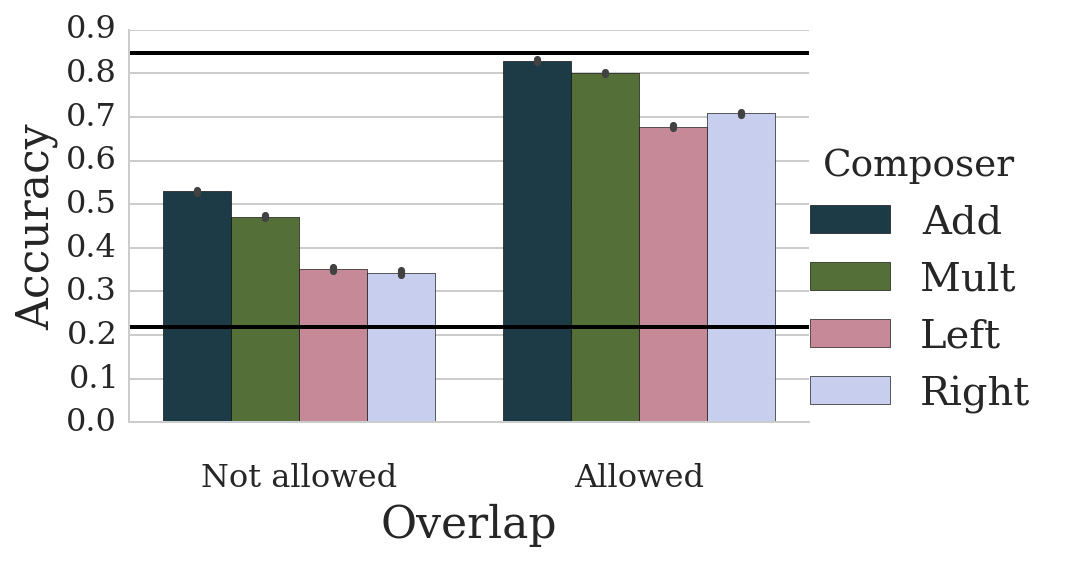

In [3]:
sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap
with sns.color_palette("cubehelix", 4):
    g = sns.factorplot(y='Accuracy', hue='Composer', x='Overlap', 
                       x_order=['Not allowed', 'Allowed'], 
                       data=df, kind='bar', ci=68, aspect=1.5);
for ax in g.axes.flat:
    ax.axhline(random_vect_baseline(), c='k');
    ax.axhline(nondistributional_baseline(**settings_of(ids[0])), c='k');
g.savefig('plot-nps-with-lexical-overlap.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [4]:
df.groupby(['Overlap', 'Composer']).mean()

Accuracy  folds
Overlap     Composer                 
Allowed     Add       0.829048  249.5
            Left      0.678007  249.5
            Mult      0.801022  249.5
            Right     0.708641  249.5
Not allowed Add       0.529362  249.5
            Left      0.352687  249.5
            Mult      0.471030  249.5
            Right     0.343514  249.5

In [8]:
from gui.user_code import pairwise_significance_exp_ids
corpus='amazon_grouped-tagged'
document_features_tr='J+N+AN+NN'
document_features_ev='AN+NN'
res = Experiment.objects.get(labelled=corpus,
                             document_features_tr=document_features_tr,
                             document_features_ev=document_features_ev,
                             expansions__decode_handler='BaseFeatureHandler')
pairwise_significance_exp_ids(zip(ids, [res.id]*len(ids)))

Running significance for (34, 5)
Running significance for (35, 5)
Running significance for (36, 5)
Running significance for (37, 5)
Running significance for (209, 5)
Running significance for (212, 5)
Running significance for (215, 5)
Running significance for (218, 5)


,name1,acc1,name2,acc2,mean_diff,pval,significant
0,34,0.529542,5,0.845445,0.315903,0,True
1,35,0.470981,5,0.845445,0.374463,0,True
2,36,0.352811,5,0.845445,0.492634,0,True
3,37,0.343414,5,0.845445,0.502030,0,True
4,209,0.828949,5,0.845445,0.016496,0,True
5,212,0.800792,5,0.845445,0.044653,0,True
6,215,0.677613,5,0.845445,0.167832,0,True
7,218,0.708527,5,0.845445,0.136917,0,True
